In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# CSV 파일 읽기
merged_df = pd.read_excel('/content/drive/MyDrive/Final_Project/final_first/data/sport.xlsx')
merged_df2 = pd.read_excel('/content/drive/MyDrive/Final_Project/final_first/data/kobis_data.xlsx')


In [3]:
merged_df

,cnt,domestic_case,imported_case,death,date,organization,league,attendance
0,1,0,1,0,2020-01-20,WKBL,정규리그,2506
1,0,0,0,0,2020-01-21,KBL,정규리그,2743
2,0,0,0,0,2020-01-21,KOVO,남자 배구,1887
3,0,0,0,0,2020-01-21,KOVO,여자 배구,1898
4,0,0,0,0,2020-01-22,KBL,정규리그,3302
...,...,...,...,...,...,...,...,...
6554,50464,50453,11,76,2023-08-31,KBO,정규리그,5806
6555,50464,50453,11,76,2023-08-31,KBO,정규리그,6455
6556,50464,50453,11,76,2023-08-31,KBO,정규리그,6683
6557,50464,50453,11,76,2023-08-31,KBO,정규리그,9846


In [4]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.0 MB/s eta 0:00:00


In [5]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

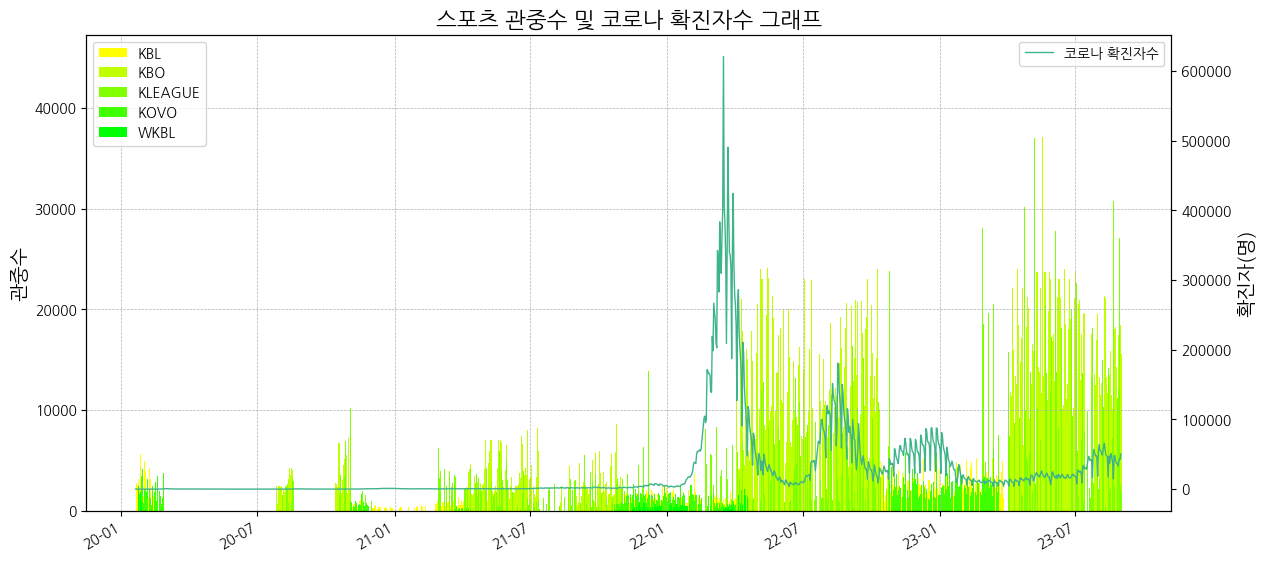

In [6]:
# 단체 5개 선택
top_5_teams = merged_df['organization'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['organization'].isin(top_5_teams)]

# 노란색에서 초록색까지의 색상 팔레트 생성
def create_yellow_to_green_palette(n_colors):
    # Define a colormap with a gradient from yellow to green
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'yellow_to_green_palette',
        ['#FFFF00', '#00FF00']
    )
    # Generate colors
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# 5가지 색상 생성
yellow_to_green_palette = create_yellow_to_green_palette(5)

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 막대 그래프: 단체별 관중수
for i, (team, group) in enumerate(filtered_df.groupby('organization')):
    ax1.bar(group['date'] + pd.DateOffset(days=i*1), group['attendance'], color=yellow_to_green_palette[i], alpha=1, width=1, label=team)

ax1.set_ylabel('관중수', color='#000000', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#000000')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 선 그래프: 계(명)
ax2 = ax1.twinx()
ax2.plot(filtered_df['date'], filtered_df['cnt'], color='#3EB489', linestyle='-', linewidth=1, label='코로나 확진자수')  # 빨간색
ax2.set_ylabel('확진자(명)', color='#000000', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#000000')

# X축 날짜 형식 조정
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))  # 월-년 형식으로 조정
fig.autofmt_xdate()  # 날짜 레이블 자동 회전

# 제목과 레전드 추가
plt.title('스포츠 관중수 및 코로나 확진자수 그래프', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

In [7]:
test_df = pd.merge(merged_df, merged_df2, on='date', how='inner')

In [8]:
test_df

,cnt,domestic_case,imported_case,death,date,organization,league,attendance,screen_cnt,total_sales,audience
0,1,0,1,0,2020-01-20,WKBL,정규리그,2506,20,100000,20
1,0,0,0,0,2020-01-21,KBL,정규리그,2743,5,31000,31
2,0,0,0,0,2020-01-21,KBL,정규리그,2743,1,6000,1
3,0,0,0,0,2020-01-21,KBL,정규리그,2743,1,6000,1
4,0,0,0,0,2020-01-21,KOVO,남자 배구,1887,5,31000,31
...,...,...,...,...,...,...,...,...,...,...,...
27998,50464,50453,11,76,2023-08-31,KBO,정규리그,9846,1,6000,1
27999,50464,50453,11,76,2023-08-31,KBO,정규리그,9846,1,6000,1
28000,50464,50453,11,76,2023-08-31,KBO,정규리그,15547,5,709800,107
28001,50464,50453,11,76,2023-08-31,KBO,정규리그,15547,1,6000,1


최근 30일 데이터를 사용해서 해당일자와 코로나 현황을 입력하면 스포츠 관중수와 해당일 개봉했을때 수요를 예측하는 모델

In [9]:
#pip install --upgrade joblib

In [10]:
#pip install scikit-learn==1.3.2

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 필요한 열 선택
features = ['date', 'cnt', 'domestic_case', 'imported_case', 'death', 'attendance', 'screen_cnt', 'total_sales', 'audience', 'organization']
test_df = test_df[features]

# 날짜 변환
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.set_index('date', inplace=True)

# 결측치 처리
test_df.fillna(0, inplace=True)

# 카테고리형 변수 인코딩
test_df = pd.get_dummies(test_df, columns=['organization'])

# 입력 및 예측 변수 분리
input_features = ['cnt', 'domestic_case', 'imported_case', 'death']
target_features = ['attendance', 'screen_cnt', 'total_sales', 'audience'] + list(test_df.columns[test_df.columns.str.startswith('organization_')])

X = test_df[input_features + list(test_df.columns[test_df.columns.str.startswith('organization_')])]
y = test_df[target_features]

# 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length-1])
    return np.array(X), np.array(y)

# 하루 단위 시퀀스 생성 (SEQ_LENGTH = 1)
SEQ_LENGTH = 1
X_seq, y_seq = create_sequences(X_scaled, SEQ_LENGTH)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # 예측할 변수의 개수에 맞게 조정
model.compile(optimizer='adam', loss='mse')

# LSTM 모델 훈련
model.fit(X_train, y_train, epochs=20, batch_size=32)

# LSTM 예측
lstm_predictions = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, lstm_predictions)
r2 = r2_score(y_test, lstm_predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


<ipython-input-11-d739e32cbefc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['date'] = pd.to_datetime(test_df['date'])
<ipython-input-11-d739e32cbefc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0370
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0872e-04
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0362e-05
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.7571e-06
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2780e-06
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.4032e-06
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0205e-06
Epoch 8/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7688e-06
Epoch 9/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7200e-06
Epoch 10/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4835e-06
Epoch 11/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8262e-06
Epoch 12/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4423e-06
Epoch 13/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2814e-06
Epoch 14/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3579e-06
Epoch

In [12]:
import pandas as pd
import numpy as np

# 새로운 데이터 준비
new_data = pd.DataFrame({
    'date': ['2024-12-01'],  # 예시 날짜
    'cnt': [300],
    'domestic_case': [200],
    'imported_case': [50],
    'death': [50],
    'organization': ['KOVO']  # 예시 단체
})

# 날짜 변환 및 인코딩
new_data['date'] = pd.to_datetime(new_data['date'])
new_data.set_index('date', inplace=True)
new_data = pd.get_dummies(new_data, columns=['organization'])

# 기존 데이터와 동일한 열을 가진 데이터프레임으로 조정
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]  # 열 순서 맞추기

# 입력 데이터 정규화
new_data_scaled = scaler_X.transform(new_data)

# 하루 단위 데이터로 LSTM 모델 예측
X_new = new_data_scaled.reshape(1, SEQ_LENGTH, -1)
lstm_new_predictions = model.predict(X_new)

# 예측 결과를 데이터프레임으로 변환하는 함수
def format_predictions(predictions, feature_names):
    return pd.DataFrame(predictions, columns=feature_names)

# Feature names
# 예측 결과의 열 수와 일치하도록 설정
feature_names = ['attendance', 'screen_cnt', 'total_sales', 'audience'] + list(test_df.columns[test_df.columns.str.startswith('organization_')])

# 예측 결과 데이터프레임으로 변환
lstm_df = format_predictions(scaler_y.inverse_transform(lstm_new_predictions), feature_names)

# 데이터프레임 출력
print("LSTM Predictions on New Data:")
print(lstm_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM Predictions on New Data:
   attendance  screen_cnt   total_sales     audience  organization_KBL  \
0  190.950348   10.642697  1.081497e+10  1388288.625         -0.002476   

   organization_KBO  organization_KLEAGUE  organization_KOVO  \
0         -0.002401             -0.001094           1.004095   

   organization_WKBL  
0          -0.001294  


In [13]:
import joblib
from tensorflow.keras.models import load_model

# LSTM 모델 저장
model.save('/content/drive/MyDrive/Final_Project/CORONA_FASTAPI/lstm_model.keras')

# Scalers 저장
joblib.dump(scaler_X, '/content/drive/MyDrive/Final_Project/CORONA_FASTAPI/scaler_X.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/Final_Project/CORONA_FASTAPI/scaler_y.pkl')

['/content/drive/MyDrive/Final_Project/CORONA_FASTAPI/scaler_y.pkl']

In [14]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 정렬
test_df.sort_index(inplace=True)

# 각 타겟 변수에 대해 ARIMA 모델을 학습하고 예측
predictions = {}
for i, target in enumerate(target_features):
    model = ARIMA(test_df[target], order=(5, 1, 0))  # (p, d, q) 파라미터는 데이터에 맞게 조정 필요
    model_fit = model.fit()
    y_pred = model_fit.predict(start=len(test_df) - len(y_test), end=len(test_df) - 1, dynamic=False)
    predictions[target] = y_pred

# 평가
for i, target in enumerate(target_features):
    if i < len(y_test[0]):  # y_test 배열이 다차원일 경우 확인
        y_true = y_test[:, i]
        y_pred = predictions[target]
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f'{target} - Mean Squared Error: {mse}')
        print(f'{target} - R^2 Score: {r2}')
    else:
        print(f'Target variable index {i} is out of range for y_test.')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


attendance - Mean Squared Error: 90915449.75655374
attendance - R^2 Score: -8059363882.537104
screen_cnt - Mean Squared Error: 31337.131922779383
screen_cnt - R^2 Score: -2780133.5245637763
total_sales - Mean Squared Error: 1.2273164384308036e+19
total_sales - R^2 Score: -4.308134752480045e+20
audience - Mean Squared Error: 107229772671.16472
audience - R^2 Score: -5459062054041.54
organization_KBL - Mean Squared Error: 0.23535464798405797
organization_KBL - R^2 Score: -1.103426104520687
organization_KBO - Mean Squared Error: 0.49071301130882017
organization_KBO - R^2 Score: -0.98480113138281
organization_KLEAGUE - Mean Squared Error: 0.22640983509491738
organization_KLEAGUE - R^2 Score: -1.1172163372557744
organization_KOVO - Mean Squared Error: 0.2542134003556704
organization_KOVO - R^2 Score: -1.1994252740811362
organization_WKBL - Mean Squared Error: 0.06391715765041957
organization_WKBL - R^2 Score: -0.06828151821476247


In [15]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 정렬
test_df.sort_index(inplace=True)

# NaN 값 처리 및 타겟 변수 검토
target_features = [target for target in target_features if not test_df[target].isnull().any()]

# 각 타겟 변수에 대해 SARIMA 모델을 학습하고 예측
predictions = {}
for target in target_features:
    try:
        # NaN 값 처리
        if test_df[target].isnull().any():
            test_df[target] = test_df[target].fillna(method='ffill').fillna(method='bfill')

        # SARIMA 모델 정의
        model = SARIMAX(test_df[target],
                        order=(5, 1, 0),  # (p, d, q) 파라미터는 데이터에 맞게 조정 필요
                        seasonal_order=(1, 1, 1, 12))  # 계절성 파라미터 (p, d, q, s)
        model_fit = model.fit(disp=0)

        # 예측 기간 계산
        start = len(test_df) - len(y_test)
        end = len(test_df) - 1

        # 예측
        y_pred = model_fit.predict(start=start, end=end, dynamic=False)
        predictions[target] = y_pred
    except Exception as e:
        print(f"Error fitting model for {target}: {e}")
        predictions[target] = np.full(len(y_test), np.nan)  # 오류 발생 시 NaN으로 채우기

# 평가
for target in target_features:
    if target in predictions:
        y_true = y_test[:, target_features.index(target)]
        y_pred = predictions[target]

        # 길이 맞추기 (예측과 실제 값의 길이가 다를 수 있으므로)
        min_len = min(len(y_true), len(y_pred))
        y_true = y_true[:min_len]
        y_pred = y_pred[:min_len]

        # NaN 값 제거
        valid_indices = ~np.isnan(y_true) & ~np.isnan(y_pred)
        y_true = y_true[valid_indices]
        y_pred = y_pred[valid_indices]

        if len(y_true) > 0:
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            print(f'{target} - Mean Squared Error: {mse}')
            print(f'{target} - R^2 Score: {r2}')
        else:
            print(f'{target} - No valid data for evaluation.')
    else:
        print(f'{target} not found in predictions.')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Error fitting model for organization_KBL: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
Error fitting model for organization_KBO: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
Error fitting model for organization_KLEAGUE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
Error fitting model for organization_KOVO: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
Error fitting model for organization_WKBL: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
attendance - Mean Squared Error: 90858232.21972921
attendance - R^2 Score: -8054291730.872856
screen_cnt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
test_df = pd.merge(merged_df, merged_df2, on='date', how='inner')

In [25]:

from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, r2_score

# 필요한 열 선택
features = ['date', 'cnt', 'domestic_case', 'imported_case', 'death', 'attendance', 'screen_cnt', 'total_sales', 'audience']
test_df = test_df[features]

# 날짜 변환
test_df.loc[:, 'date'] = pd.to_datetime(test_df['date'])
test_df.set_index('date', inplace=True)

# 결측치 처리
test_df.fillna(0, inplace=True)

# 데이터 분할 (훈련용/테스트용)
train_size = int(len(test_df) * 0.8)
train, test = test_df.iloc[:train_size], test_df.iloc[train_size:]

# VAR 모델 훈련 (모든 변수 사용)
model = VAR(train)
model_fit = model.fit()

# 예측 (테스트 데이터의 길이만큼 예측)
forecast = model_fit.forecast(train.values[-model_fit.k_ar:], steps=len(test))

# 예측 결과를 DataFrame으로 변환
forecast_df = pd.DataFrame(forecast, index=test.index, columns=train.columns)

# 평가
mse = mean_squared_error(test, forecast_df)
r2 = r2_score(test, forecast_df)

print(f'VAR - Mean Squared Error: {mse}')
print(f'VAR - R^2 Score: {r2}')

# 예측 결과 출력
print(forecast_df)


VAR - Mean Squared Error: 5.239955928323674e+18
VAR - R^2 Score: -0.33232665151071034
                     cnt  domestic_case  imported_case      death  \
date                                                                
2022-11-17  55362.480438   55323.452791      39.027647  66.962081   
2022-11-17  55314.464262   55275.409474      39.054787  66.921492   
2022-11-17  55265.815371   55226.733846      39.081526  66.880036   
2022-11-17  55216.474221   55177.366246      39.107975  66.838209   
2022-11-17  55166.456000   55127.321828      39.134172  66.796143   
...                  ...            ...            ...        ...   
2023-08-31  30153.712785   30083.194549      70.518236  34.580175   
2023-08-31  30153.765528   30083.247159      70.518369  34.580217   
2023-08-31  30153.818218   30083.299716      70.518502  34.580258   
2023-08-31  30153.870855   30083.352220      70.518635  34.580300   
2023-08-31  30153.923440   30083.404672      70.518768  34.580341   

             att

<ipython-input-25-b4772fb6148f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
